In [3]:
import Pkg;
Pkg.add("GaussianDistributions")

   Resolving package versions...
    Updating `~/.julia/environments/v1.9/Project.toml`
  [43dcc890] + GaussianDistributions v0.5.2
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [4]:
using Kalman, GaussianDistributions, LinearAlgebra
using GaussianDistributions: ⊕ # independent sum of Gaussian r.v.
using Statistics

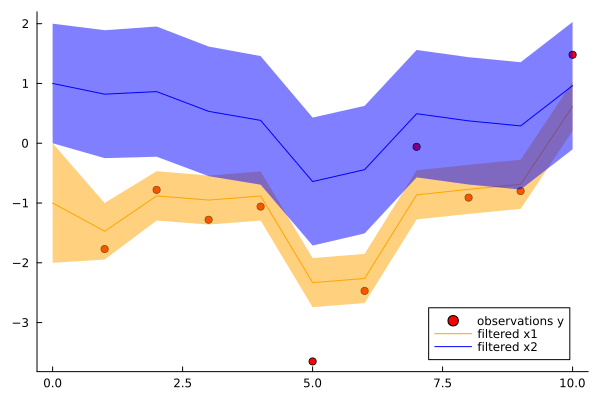

"/Users/bill/Desktop/Cambridge/IIB/IIB_Project/Codes/IIB_Codes/filter.png"

In [9]:

# prior for time 0
x0 = [-1., 1.]
P0 = Matrix(1.0I, 2, 2)

# dynamics
Φ = [0.8 0.2; -0.1 0.8]
b = zeros(2)
Q = [0.2 0.0; 0.0 0.5]

# observation
H = [1.0 0.0]
R = Matrix(0.3I, 1, 1)

# (mock) data
ys = [[-1.77], [-0.78], [-1.28], [-1.06], [-3.65], [-2.47], [-0.06], [-0.91], [-0.80], [1.48]]


# filter (assuming first observation at time 1)
N = length(ys)

p = Gaussian(x0, P0)
ps = [p] # vector of filtered Gaussians
for i in 1:N
    global p
    # predict
    p = Φ*p ⊕ Gaussian(zero(x0), Q) #same as Gaussian(Φ*p.μ, Φ*p.Σ*Φ' + Q)
    # correct
    p, yres, _ = Kalman.correct(Kalman.JosephForm(), p, (Gaussian(ys[i], R), H))
    push!(ps, p) # save filtered density
end

using Plots

p1 = scatter(1:N, first.(ys), color="red", label="observations y")
plot!(p1, 0:N, [mean(p)[1] for p in ps], color="orange", label="filtered x1", grid=false, ribbon=[sqrt(cov(p)[1,1]) for p in ps], fillalpha=.5)
plot!(p1, 0:N, [mean(p)[2] for p in ps], color="blue", label="filtered x2", grid=false, ribbon=[sqrt(cov(p)[2,2]) for p in ps], fillalpha=.5)
display(p1)
savefig(p1, "filter.png")

### Here we implement Langevin Dynamics using the Kalman filter functions.
